<a href="https://colab.research.google.com/github/swarthyPig/Raspberry-Pi_DHT22_Weather_Station_with_correlation-and-ML/blob/master/machine%20learning/scikit_learn_MRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

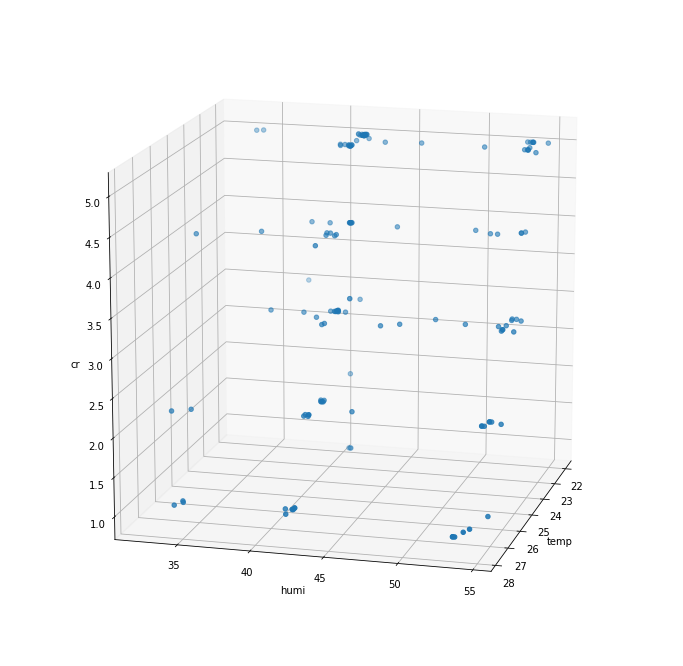

In [4]:
import sklearn.linear_model
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

data = read_csv('iot_data.csv', sep=',')

data = np.array(data, dtype=np.float32)

xs = np.array(data[:,1], dtype=np.float32)
ys = np.array(data[:,2], dtype=np.float32)
zs = np.array(data[:,-1], dtype=np.float32)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('temp')
ax.set_ylabel('humi')
ax.set_zlabel('cr')
ax.view_init(15, 15)

plt.show()


In [5]:
# data split
from sklearn.model_selection import train_test_split

x_data = data[0:-50, 1:-1] # temp, humi

y_data = data[0:-50, [-1]] # cr

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size=0.2, random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(88, 2)
(88, 1)
(23, 2)
(23, 1)


In [27]:
# sklearn을 사용한 회귀
model = sklearn.linear_model.LinearRegression()
model.fit(x_train, y_train)

print(model)
print('TH&cr [25,43] : ', model.predict([[25,43]]))
print('TH&cr [23,53] : ', model.predict([[23,53]]))
print("train 세트 정확도: {:.2f}".format(model.score(x_train, y_train)))
print("test 세트 정확도: {:.2f}".format(model.score(x_test, y_test)))
print("weigths: ",model.coef_)
print("bias : ",np.hstack(model.intercept_[:,None]))
W_ = [[model.coef_[0][0]],[model.coef_[0][1]]]
b_ = np.hstack(model.intercept_[:,None])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
TH&cr [25,43] :  [[2.71894407]]
TH&cr [23,53] :  [[4.20123816]]
train 세트 정확도: 0.87
test 세트 정확도: 0.90
weigths:  [[-0.7859277  -0.00895613]]
bias :  [22.75225]


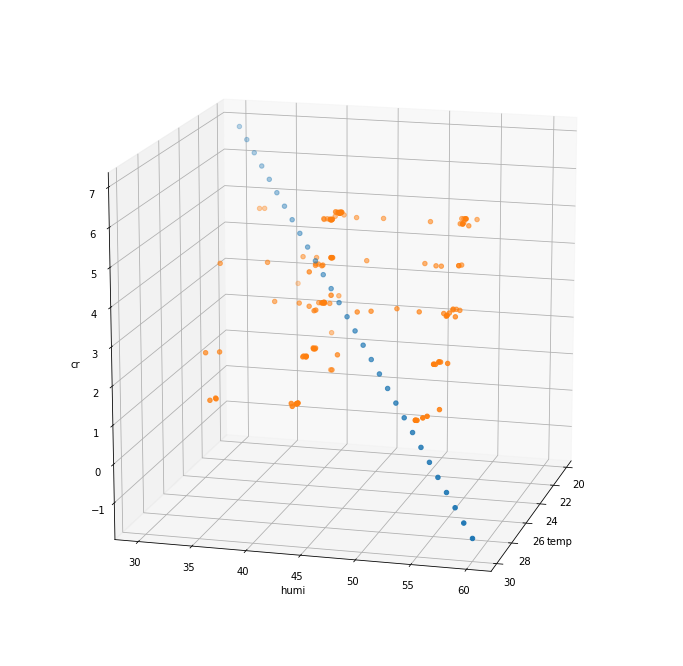

In [24]:
x = np.linspace(20, 30, 30).reshape(30,1) # Temp range(20~30, 간격:30)
y = np.linspace(30, 60, 30).reshape(30,1) # Humi range(30~60, 간격:30)

X = np.concatenate((x,y), axis=1)
Z = np.matmul(X, W_) + b_

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, Z)
ax.scatter(xs, ys, zs)
ax.set_xlabel('temp')
ax.set_ylabel('humi')
ax.set_zlabel('cr')
ax.view_init(15, 15)

plt.show()

In [28]:
# knn(최근접이웃(k-Nearest Neighbors))을 사용한 회귀
knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train)

print(knn)
print('TH&cr [25,43] : ', knn.predict([[25,43]]))
print('TH&cr [23,53] : ', knn.predict([[23,53]]))
print("train 세트 정확도: {:.2f}".format(knn.score(x_train, y_train)))
print("test 세트 정확도: {:.2f}".format(knn.score(x_test, y_test)))
#print("weigths: ",knn.coef_)
#print("bias : ",np.hstack(knn.intercept_[:,None]))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')
TH&cr [25,43] :  [[2.6666667]]
TH&cr [23,53] :  [[4.6666665]]
train 세트 정확도: 0.86
test 세트 정확도: 0.92


In [29]:
# KNeighborsClassifier 사용 회귀
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

print(knn)
print('TH&cr [25,43] : ', knn.predict([[25,43]]))
print('TH&cr [23,53] : ', knn.predict([[23,53]]))
print("train 세트 정확도: {:.2f}".format(knn.score(x_train, y_train)))
print("test 세트 정확도: {:.2f}".format(knn.score(x_test, y_test)))
#print("weigths: ",knn.coef_)
#print("bias : ",np.hstack(knn.intercept_[:,None]))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
TH&cr [25,43] :  [3.]
TH&cr [23,53] :  [5.]
train 세트 정확도: 0.85
test 세트 정확도: 0.78


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
